### 1. Quantum Computing with Qiskit
In this small Notebook I will be taking my first steps with IBMs Quantum Experience and qiskit.

In [2]:
import qiskit as q

### 2. Composing the first circuit

In [3]:
# 2 q-bits and 2 classical bits
circuit = q.QuantumCircuit(2,2)

In [4]:
# q-bits start as 0; flip 1. qubit to 1
circuit.x(0)

# Apply c-not (controlled not) gate to 2nd q-bit; c-not: flip q-bit to 1 if other q-bit is a 1, otherwise do nothing
circuit.cx(0, 1)

# Write value of first q-bit to first classical bit and 2nd to 2nd:
circuit.measure([0,1], [0,1])

# draw circuit:
circuit.draw()

┌───┐     ┌─┐   
q_0: ┤ X ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c_0: ═══════════╩══╬═
                   ║ 
c_1: ══════════════╩═

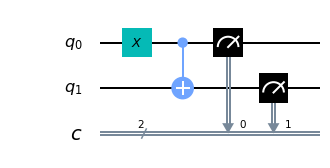

In [5]:
# draw as matplotlib 
circuit.draw(output = "mpl")

### 3. Setting up the account

In [6]:
# The code was removed by Watson Studio for sharing.

In [8]:
from qiskit import IBMQ
# JUST FOR INITIAL SETUP: Connect to IBM Quantum Experience Account
IBMQ.save_account(token)

In [9]:
# Use the following for following notebooks, as the connection should be saved for the future:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### 4. Execute circuit

In [11]:
# Next get an overview of the quees for different available quantum computer:
provider = IBMQ.get_provider("ibm-q")

# Each p stands for one Quantum Computer.
for backend in provider.backends():
    # One availabe Quantum Computer is only simulated and hence has no set number of qubits
    try:
        n_qubits = len(backend.properties().qubits)
        
    except:
        n_qubits = "simulated"
        
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {n_qubits} qubits")

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 5 queued and 5 qubits
ibmq_16_melbourne has 9 queued and 15 qubits
ibmq_vigo has 6 queued and 5 qubits
ibmq_ourense has 1 queued and 5 qubits
ibmq_london has 4 queued and 5 qubits
ibmq_burlington has 0 queued and 5 qubits
ibmq_essex has 4 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits
ibmq_rome has 6 queued and 5 qubits


In [13]:
from qiskit.tools.monitor import job_monitor

# select backend with minimal length que and sufficient number of qubits
backend = provider.get_backend("ibmq_london")

# Shots equals the number of times the circuit gets run. This is necessary, as quantum computing is based on probability in the end.
# The more shots you take the more certain the cummulative result will be.
job = q.execute(circuit, backend=backend, shots=300)
job_monitor(job)

Job Status: job has successfully run


### 5. Result

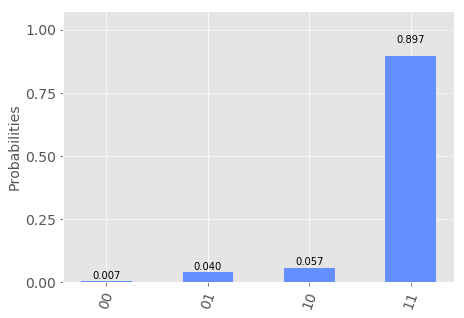

In [16]:
from qiskit.visualization import plot_histogram
from matplotlib import style
style.use("ggplot")

result = job.result()
counts = result.get_counts()

plot_histogram([counts])

As one would expect, the most frequent outcome of the computation is 1 1.  
The other outcomes are referred to as quantum noise, meaning the qubits states have been messed with by its surrounding, thus changing the outcome.  
This shows nicel why we needed to take many shots ( as we defined in step 4) to be more certain of a correct result.  
Correcting for such errors is still a huge problem in Quantum computing and prohibiting us from constructing more complex quantum machines.